In [182]:
import numpy as np
import pandas as pd
import pandasql 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime, timedelta, timezone
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from opensea import OpenseaAPI

In [183]:
# API Client
api = OpenseaAPI(apikey="7936ad8238ba4b6db01da03755b4b0cd")

In [184]:
# We define our collection slug
collection_slug = "cryptopunks"

In [185]:
# Some stats about the NFT collection
api.collection_stats(collection_slug=collection_slug)

{'stats': {'one_day_volume': 1210.8799999999999,
  'one_day_change': 0.6364570100278398,
  'one_day_sales': 17.0,
  'one_day_average_price': 71.22823529411764,
  'seven_day_volume': 10317.900000001,
  'seven_day_change': -0.04801930183090602,
  'seven_day_sales': 101.0,
  'seven_day_average_price': 102.15742574258415,
  'thirty_day_volume': 33822.111000001016,
  'thirty_day_change': -0.7929115979471358,
  'thirty_day_sales': 355.0,
  'thirty_day_average_price': 95.27355211267891,
  'total_volume': 750725.3212493045,
  'total_sales': 18123.0,
  'total_supply': 9999.0,
  'count': 9999.0,
  'num_owners': 3281,
  'average_price': 41.42389898191825,
  'num_reports': 4,
  'market_cap': 1021472.100000099,
  'floor_price': None}}

In [195]:
# Historical data parameters
end_date = datetime.now()
start_date = end_date - timedelta(days=120)

def get_events(collection_slug: str, start_date: datetime, end_date: datetime) -> pd.DataFrame:
    events_ids = set()
    events = dict()
    end = end_date
    while True:
        new_events = api.events(
            collection_slug=collection_slug,
            event_type="successful",  # sales
            occurred_before=end,
            occurred_after=start_date,
            limit=300,
        ).get("asset_events", list())
        previous_len = len(events)
        events.update({event["transaction"]["transaction_hash"]: event for event in new_events})
        if len(events) == previous_len:
            break
        if len(events) <= 1:
            break
        end = datetime.fromisoformat(new_events[-1]["created_date"])
        print("current date computed:", end, end="\r")
    return pd.DataFrame(events.values())
        

In [196]:
sales_data = get_events(collection_slug, start_date, end_date)
sales_data

,approved_account,asset,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,...,owner_account,payment_token,quantity,seller,starting_price,to_account,total_price,transaction,winner_account,listing_time
0,None,"{'id': 526447, 'token_id': '2257', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-12-16T16:34:22.117378,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': None, 'profile_img_url': 'https://sto...",None,None,61500000000000000000,{'block_hash': '0xfd73ced46df664c101c97f73bbe6...,"{'user': None, 'profile_img_url': 'https://sto...",None
1,None,"{'id': 530528, 'token_id': '9016', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-12-16T12:04:33.805343,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,{'user': {'username': 'RationalStickyApeOfWarr...,None,None,64000000000000000020,{'block_hash': '0x93a29d96002a947af9e05a83e0c0...,"{'user': {'username': 'NullAddress'}, 'profile...",None
2,None,"{'id': 176622, 'token_id': '906', 'num_sales':...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-12-16T11:09:22.987421,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,{'user': {'username': 'RationalStickyApeOfWarr...,None,None,60990000000000000000,{'block_hash': '0x0107a425a78c39e63305814e4b52...,"{'user': None, 'profile_img_url': 'https://sto...",None
3,None,"{'id': 178135, 'token_id': '9303', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-12-16T07:09:26.162556,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': {'username': 'kvkape'}, 'profile_img_...",None,None,60000000000000000000,{'block_hash': '0x0355c8a3f0fa57a34cc2cafcbe11...,"{'user': {'username': None}, 'profile_img_url'...",None
4,None,"{'id': 530487, 'token_id': '8937', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-12-16T06:35:00.787628,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': {'username': 'abc_123_0xf2'}, 'profil...",None,None,58500000000000000000,{'block_hash': '0x4d2d0419e2681318011a70058fb8...,"{'user': None, 'profile_img_url': 'https://sto...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,None,"{'id': 528884, 'token_id': '6325', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-08-18T19:46:35.692377,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': None, 'profile_img_url': 'https://sto...",None,None,42000000000000000000,{'block_hash': '0xf1178f8bde299705073c7479d5fa...,"{'user': {'username': 'NullAddress'}, 'profile...",None
2788,None,"{'id': 526134, 'token_id': '1728', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-08-18T19:20:51.853309,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': None, 'profile_img_url': 'https://sto...",None,None,37000000000000000000,{'block_hash': '0x9d03c91dfaaf19c3aaf44f3e1c06...,"{'user': {'username': 'NullAddress'}, 'profile...",None
2789,None,"{'id': 177419, 'token_id': '1514', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-08-18T19:13:49.311148,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': None, 'profile_img_url': 'https://sto...",None,None,60000000000000000000,{'block_hash': '0xafe70688efced3217ba31208e6ed...,"{'user': {'username': 'NullAddress'}, 'profile...",None
2790,None,"{'id': 528177, 'token_id': '5207', 'num_sales'...",None,None,None,cryptopunks,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,2021-08-18T18:47:28.493350,None,None,...,None,"{'id': 1, 'symbol': 'ETH', 'address': '0x00000...",1,"{'user': {'username': 'ape123'}, 'profile_img_...

{'block_hash': '0xfd73ced46df664c101c97f73bbe6faaf849124d51fb0bb6301d3ef1f9816891e',
 'block_number': '13817287',
 'from_account': {'user': None,
  'profile_img_url': 'https://storage.googleapis.com/opensea-static/opensea-profile/22.png',
  'address': '0xce57289c4a2cc16a3d1ce43b69218679c52eb5b5',
  'config': ''},
 'id': 224900590,
 'timestamp': '2021-12-16T16:33:52',
 'to_account': {'user': None,
  'profile_img_url': 'https://storage.googleapis.com/opensea-static/opensea-profile/23.png',
  'address': '0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb',
  'config': ''},
 'transaction_hash': '0x7efa15e3742c2b5f3de1192a3bb6f3f6645bf91c9e686bbed45e63731e4cea65',
 'transaction_index': '59'}

In [227]:
# For simplicility we extract only the only we need
sales_data_extract = sales_data.copy()[["created_date", "total_price", "quantity"]]
# We convert to datetime
sales_data_extract["created_date"] = pd.to_datetime(sales_data_extract["created_date"])
# The current price is in Wei and too large to be converted by pandas so we use python and convert to ETH
sales_data_extract["total_price"] = sales_data_extract["total_price"].map(lambda x:int(x)/10 ** 18)
sales_data_extract["quantity"] = sales_data_extract["quantity"].astype(int)
# We get the average price
sales_data_extract["average_price"] = sales_data_extract["total_price"]/sales_data_extract["quantity"]
# We remove 0 prices
sales_data_extract = sales_data_extract[sales_data_extract["total_price"] > 20]
sales_data_extract

,created_date,total_price,quantity,average_price
0,2021-12-16 16:34:22.117378,61.50,1,61.50
1,2021-12-16 12:04:33.805343,64.00,1,64.00
2,2021-12-16 11:09:22.987421,60.99,1,60.99
3,2021-12-16 07:09:26.162556,60.00,1,60.00
4,2021-12-16 06:35:00.787628,58.50,1,58.50
...,...,...,...,...
2787,2021-08-18 19:46:35.692377,42.00,1,42.00
2788,2021-08-18 19:20:51.853309,37.00,1,37.00
2789,2021-08-18 19:13:49.311148,60.00,1,60.00
2790,2021-08-18 18:47:28.493350,39.75,1,39.75


In [228]:
# We get the average price over a day
daily_data = sales_data_extract.groupby(sales_data_extract.created_date.dt.date).min()
# We add the daily_changes
daily_data["daily_change"] = daily_data["average_price"].pct_change()
sales_data_extract[sales_data_extract["created_date"].dt.date  == datetime(2021,8,19).date()]
daily_data

,created_date,total_price,quantity,average_price,daily_change
created_date,,,,,
2021-08-18,2021-08-18 17:11:37.740676,37.00,1,37.00,NaN
2021-08-19,2021-08-19 00:25:35.404524,43.00,1,43.00,0.162162
2021-08-20,2021-08-20 00:15:29.873257,44.00,1,44.00,0.023256
2021-08-21,2021-08-21 01:52:42.680201,40.00,1,40.00,-0.090909
2021-08-22,2021-08-22 02:10:48.900935,51.08,1,51.08,0.277000
...,...,...,...,...,...
2021-12-12,2021-12-12 04:48:42.143754,69.80,1,69.80,0.042569
2021-12-13,2021-12-13 01:43:39.958980,61.50,1,61.50,-0.118911
2021-12-14,2021-12-14 01:07:28.421912,62.00,1,62.00,0.008130


In [249]:
# We compute historical annualized mean and volatility of returns
current_price = daily_data["average_price"].iloc[-1]
annual_return = daily_data["daily_change"].mean()
annual_volatility = daily_data["daily_change"].std()
historical_data = {"current_price": current_price, "annual_return": annual_return, "annual_volatility": annual_volatility}
historical_data

{'current_price': 57.0,
 'annual_return': 0.008688341183932214,
 'annual_volatility': 0.1082785983297236}

In [261]:
class Brownian():
    """A Brownian motion class constructor With Geometric brownian for stock simulations."""
    def __init__(self, x0: float = 0) -> None:
        """Init class."""
        self.x0 = float(x0)
    
    def gen_random_walk(self, n_step: int=100) -> np.array:
        """Generate motion by random walk.
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self, n_step: int=100) -> np.array:
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
        self,
        start_date: datetime,
        price_init: float=100.0,
        mu: float =1,
        sigma: float=1,
        interval: int = 60,
        duration: int = 10,
    ) -> pd.DataFrame:
        """Models a stock price S(t) using the Weiner process W(t):
        
        S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            price_init: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            interval: The interval in seconds between each iteration default 60s
            duration: The duration of the whole sample in days default 10 days.
        
        Returns:
            stock_price: A Pandas Dataframe with the simulated stock prices over the time-period.
        """
        # We compute the duration in seconds.
        duration_seconds = duration
        # We compute the number of steps.
        n_step = duration_seconds // interval
        time_vector = np.linspace(0,duration_seconds,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2)) * time_vector
        #sigma_var = sigma / ((3600 * 24 * 365) ** 0.5) * (interval ** 0.5)
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the "gen_normal" method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        stock_price = pd.DataFrame(price_init*(np.exp(stock_var+weiner_process)))
        stock_price.columns = ["price"]
        stock_price.price = stock_price.price.round(2)
        # we get the current date
        stock_price.index = [start_date + timedelta(seconds=int(i)) for i in time_vector]
        return stock_price

<AxesSubplot:>

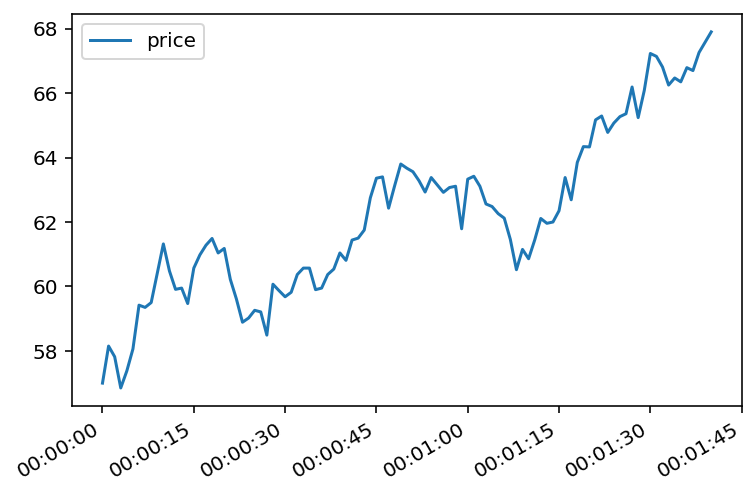

In [270]:
# We simulate our NFT
Brownian().stock_price(
    start_date=datetime(2021, 12, 15),
    price_init=current_price,
    mu=annual_return, # growth rate
    sigma=annual_volatility,  # volatility (in years)
    interval=1,  # interval between observations in seconds
    duration=100,  # Duration in days.
    
).plot()

